# 共享单车数据可视化
[项目来自共享单车](https://www.kaggle.com/c/bike-sharing-demand)

作者：Nicolas
    
---

# 目录
1. 提出问题（Business Undersanding）
2. 理解数据(Data Understanding)
 * 采集数据
 * 导入数据
 * 查看数据信息
3. 数据清洗(Data Preparation)
 * 数据预处理
 * 特征工程（Feature Engineering）
4. 构建模型(Modeling)
5. 模型评估(Evaluation)
6. 方案实施(Deployment)
 * 提交结果到Kaggle
 * 报告撰写

![ai.jpg](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1527239482610&di=b6debb99c08629bd2053f79cf93f4f89&imgtype=0&src=http%3A%2F%2Fimg.mp.sohu.com%2Fq_mini%2Cc_zoom%2Cw_640%2Fupload%2F20170801%2Fc425160a201544e6830477daa38874ef_th.jpg)

# 1.提出问题

共享单车在国内大热的同时，像摩拜、小黄车等已经打入海外市场，我们这次的项目就是关于共享单车的数据可视化分析。

**通过历史用车记录结合天气等数据预测共享单车项目在华盛顿的需求**

>*Participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital  Bikeshare program in Washington, D.C.*

# 2.理解数据

数据理解分为三部分：

1.采集数据：这一部分，根据研究问题采集数据。

2.导入数据：将外部数据导入Notebook中。

3.查看数据集信息

## 2.1采集数据

[点击下载共享单车数据](https://www.kaggle.com/c/bike-sharing-demand/data)

## 2.2导入数据

In [1]:
#导入数据包
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
#导入数据
#训练数据集
train=pd.read_csv("C:\\Users\\Nicolas\\train.csv")
#测试数据集
test=pd.read_csv("C:\\Users\\Nicolas\\test.csv")
print('训练数据集：',train.shape,'测试数据集：',test.shape)

训练数据集： (10886, 12) 测试数据集： (6493, 9)


## 2.3查看数据集信息

In [4]:
#查看数据集
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
#查看训练数据每一列数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [7]:
#查看训练数据每一列数据类型
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [8]:
#合并数据集
full=train.append(test,ignore_index=True)
print('合并后的数据集：',full.shape)

合并后的数据集： (17379, 12)


In [9]:
#查看数据集
full.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [10]:
#获取数据类型的描述统计信息
full.describe()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
count,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,36.021955,191.574132,0.028770,62.722884,155.552177,2.501640,20.376474,1.425283,12.736540,0.682721
std,8.592511,49.960477,181.144454,0.167165,19.292983,151.039033,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,16.665000,4.000000,42.000000,0.000000,48.000000,36.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,24.240000,17.000000,145.000000,0.000000,63.000000,118.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,31.060000,49.000000,284.000000,0.000000,78.000000,222.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,50.000000,367.000000,977.000000,1.000000,100.000000,886.000000,4.000000,41.000000,4.000000,56.996900,1.000000


In [11]:
#查看每一列数据类型
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null object
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


### 数据说明

* datetime时间 - 年月日小时
* season季节 - 1 = spring春天, 2 = summer夏天, 3 = fall秋天, 4 = winter冬天
* holiday节假日 - 0：否，1：是
* workingday工作日 - 该天既不是周末也不是假日（0：否，1：是）
* weather天气 - 1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）
* temp实际温度 - 摄氏度
* atemp体感温度 - 摄氏度
* humidity湿度 - 相对湿度
* windspeed风速 - 风速
* casual - 未注册用户租借数量
* registered - 注册用户租借数量
* count - 总租借数量

### 分析

1.训练数据集：
* 总共10886行，12列，各字段均无缺失值
* 时间数据需要进行处理

2.测试数据集：
* 总共6493行，9列，个字段均无缺失值
* 时间数据需要进行处理


# 3.数据清洗

## 3.1特征工程

### 时间特征处理

我们需要从不同的维度去分析数据，所以需要将数据分解到：月份Month,星期Week,日day,小时hour

In [12]:
from datetime import datetime

In [13]:
def getMonth(x):
    Str1=x.split()[0]
    Str2=datetime.strptime(Str1,"%Y-%m-%d")
    month=Str2.month
    return month

In [14]:
full['month']=full.datetime.apply(getMonth)
full.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,1
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,1
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,1


In [15]:
def getweek(x):
    Str3=x.split()[0]
    Str4=datetime.strptime(Str3,"%Y-%m-%d")
    weekday=Str4.weekday()
    return weekday

In [16]:
full['weekday']=full.datetime.apply(getweek)
full.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,1,5
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1,5
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,1,5
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,1,5
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,1,5


In [17]:
full['date']=full['datetime'].map(lambda x:x.split()[0])

In [18]:
full.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,1,5,2011-01-01
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,1,5,2011-01-01
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,1,5,2011-01-01


In [19]:
full['hour']=full['datetime'].map(lambda x:x.split()[1].split(':')[0])

In [20]:
full.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date,hour
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01,00
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01,01
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,1,5,2011-01-01,02
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,1,5,2011-01-01,03
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,1,5,2011-01-01,04


In [21]:
full.drop('datetime',inplace=True,axis=1)

In [22]:
full.head()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date,hour
0,14.395,3.0,16.0,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01,00
1,13.635,8.0,40.0,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01,01
2,13.635,5.0,32.0,0,80,27.0,1,9.02,1,0.0,0,1,5,2011-01-01,02
3,14.395,3.0,13.0,0,75,10.0,1,9.84,1,0.0,0,1,5,2011-01-01,03
4,14.395,0.0,1.0,0,75,1.0,1,9.84,1,0.0,0,1,5,2011-01-01,04


In [23]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
month         17379 non-null int64
weekday       17379 non-null int64
date          17379 non-null object
hour          17379 non-null object
dtypes: float64(6), int64(7), object(2)
memory usage: 2.0+ MB


In [24]:
full['hour']=pd.to_numeric(full['hour'])

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
month         17379 non-null int64
weekday       17379 non-null int64
date          17379 non-null object
hour          17379 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 2.0+ MB


In [26]:
#训练数据集有10886行
trainRow=10886
train_X=full.loc[0:trainRow-1,:]
#训练数据集
test_X=full.loc[trainRow:,:]

In [27]:
train_X.head()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date,hour
0,14.395,3.0,16.0,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01,0
1,13.635,8.0,40.0,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01,1
2,13.635,5.0,32.0,0,80,27.0,1,9.02,1,0.0,0,1,5,2011-01-01,2
3,14.395,3.0,13.0,0,75,10.0,1,9.84,1,0.0,0,1,5,2011-01-01,3
4,14.395,0.0,1.0,0,75,1.0,1,9.84,1,0.0,0,1,5,2011-01-01,4


In [28]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
atemp         10886 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
holiday       10886 non-null int64
humidity      10886 non-null int64
registered    10886 non-null float64
season        10886 non-null int64
temp          10886 non-null float64
weather       10886 non-null int64
windspeed     10886 non-null float64
workingday    10886 non-null int64
month         10886 non-null int64
weekday       10886 non-null int64
date          10886 non-null object
hour          10886 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1.2+ MB


## 3.2特征选择

In [29]:
correlation=train_X.corr()
correlation

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,hour
atemp,1.000000,0.462067,0.389784,-0.005215,-0.043536,0.314635,0.264744,0.984948,-0.055376,-0.057473,0.024660,0.264173,-0.040235,0.140343
casual,0.462067,1.000000,0.690414,0.043799,-0.348187,0.497250,0.096758,0.467097,-0.135918,0.092276,-0.319111,0.092722,0.246959,0.302045
count,0.389784,0.690414,1.000000,-0.005393,-0.317371,0.970948,0.163439,0.394454,-0.128655,0.101369,0.011594,0.166862,-0.002283,0.400601
holiday,-0.005215,0.043799,-0.005393,1.000000,0.001929,-0.020956,0.029368,0.000295,-0.007074,0.008409,-0.250491,0.001731,-0.191832,-0.000354
humidity,-0.043536,-0.348187,-0.317371,0.001929,1.000000,-0.265458,0.190610,-0.064949,0.406244,-0.318607,-0.010880,0.204537,-0.026507,-0.278011
registered,0.314635,0.497250,0.970948,-0.020956,-0.265458,1.000000,0.164011,0.318571,-0.109340,0.091052,0.119460,0.169451,-0.084427,0.380540
season,0.264744,0.096758,0.163439,0.029368,0.190610,0.164011,1.000000,0.258689,0.008879,-0.147121,-0.008126,0.971524,-0.010553,-0.006546
temp,0.984948,0.467097,0.394454,0.000295,-0.064949,0.318571,0.258689,1.000000,-0.055035,-0.017852,0.029966,0.257589,-0.038466,0.145430
weather,-0.055376,-0.135918,-0.128655,-0.007074,0.406244,-0.109340,0.008879,-0.055035,1.000000,0.007261,0.033772,0.012144,-0.047692,-0.022740
windspeed,-0.057473,0.092276,0.101369,0.008409,-0.318607,0.091052,-0.147121,-0.017852,0.007261,1.000000,0.013373,-0.150192,-0.024804,0.146631


# 可视化分析

## 3.3相关系数热图

In [30]:
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


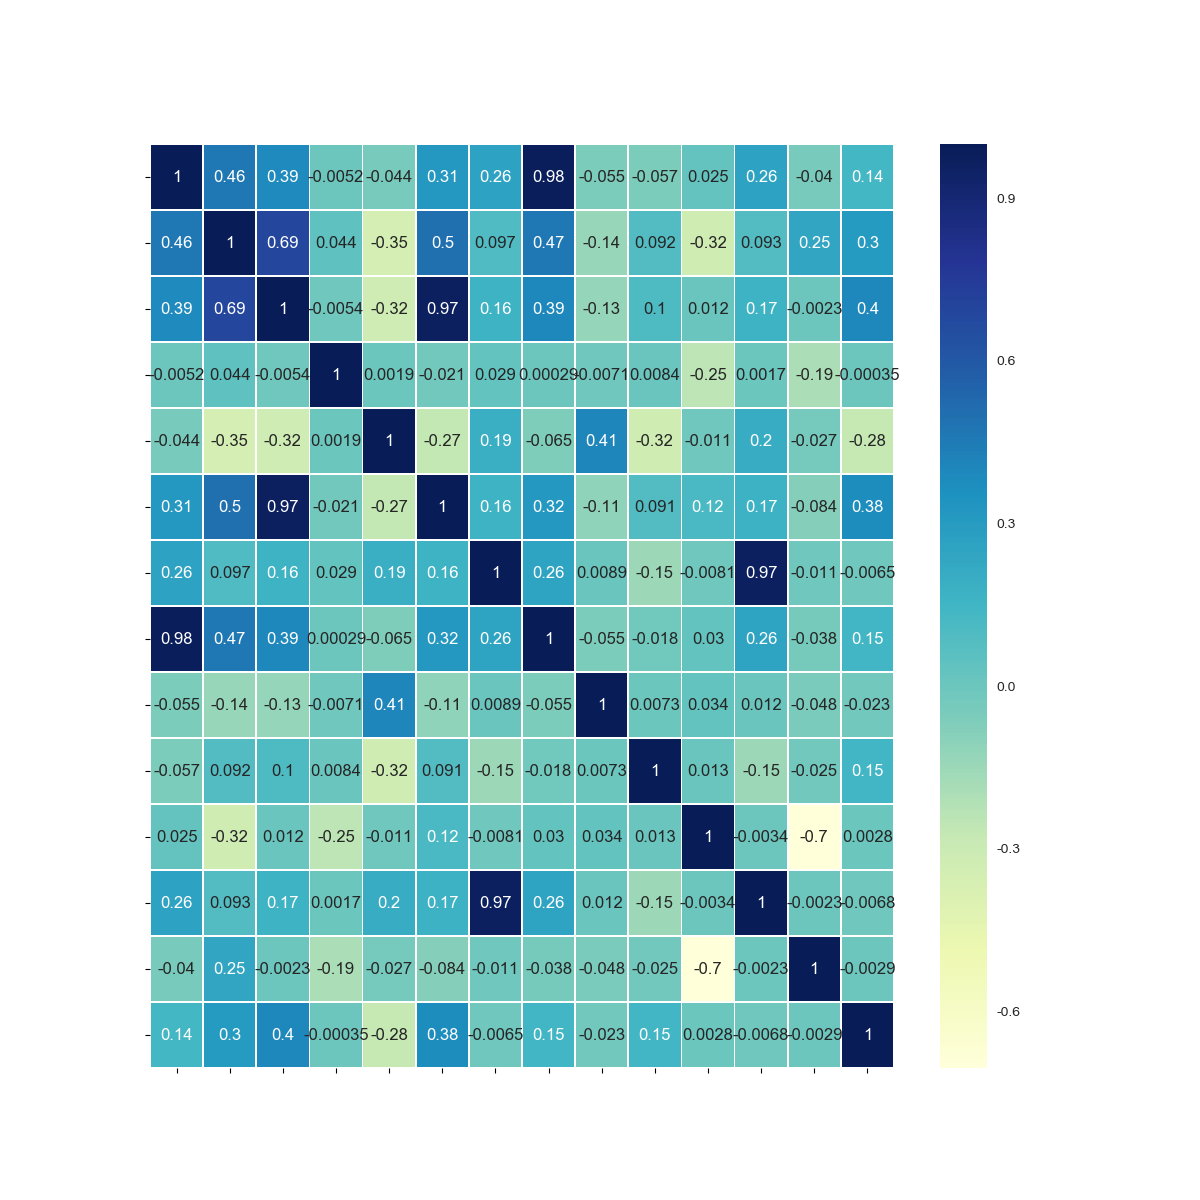

In [31]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(correlation,ax=ax1,vmax=1,square=False,annot=True,cmap='YlGnBu',linewidths=.5)
plt.title('Heatmap on Correlation',fontsize=30,color='white')
plt.xticks(fontsize=18,color='white',rotation=45)
plt.yticks(fontsize=18,color='white')
plt.show()

## 分析

### count

* 与体感温度呈正相关关系
* 与湿度呈负相关关系
* 与气温呈正相关关系
* 与小时呈正相关关系

## 租车人数在各分类变量下的箱线图

In [32]:
seasonDict={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
train_X['season_word']=train_X['season'].map(seasonDict)
train_X.head(2)

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date,hour,season_word
0,14.395,3.0,16.0,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01,0,Spring
1,13.635,8.0,40.0,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01,1,Spring


In [33]:
weatherDict={1:'good weaher',2:'cloudy',3:'little rainy or snowy',4:'bad weather'}
train_X['weather_word']=train_X['weather'].map(weatherDict)
train_X.head(2)

C:\Users\Nicolas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday,month,weekday,date,hour,season_word,weather_word
0,14.395,3.0,16.0,0,81,13.0,1,9.84,1,0.0,0,1,5,2011-01-01,0,Spring,good weaher
1,13.635,8.0,40.0,0,80,32.0,1,9.02,1,0.0,0,1,5,2011-01-01,1,Spring,good weaher


<IPython.core.display.Javascript object>


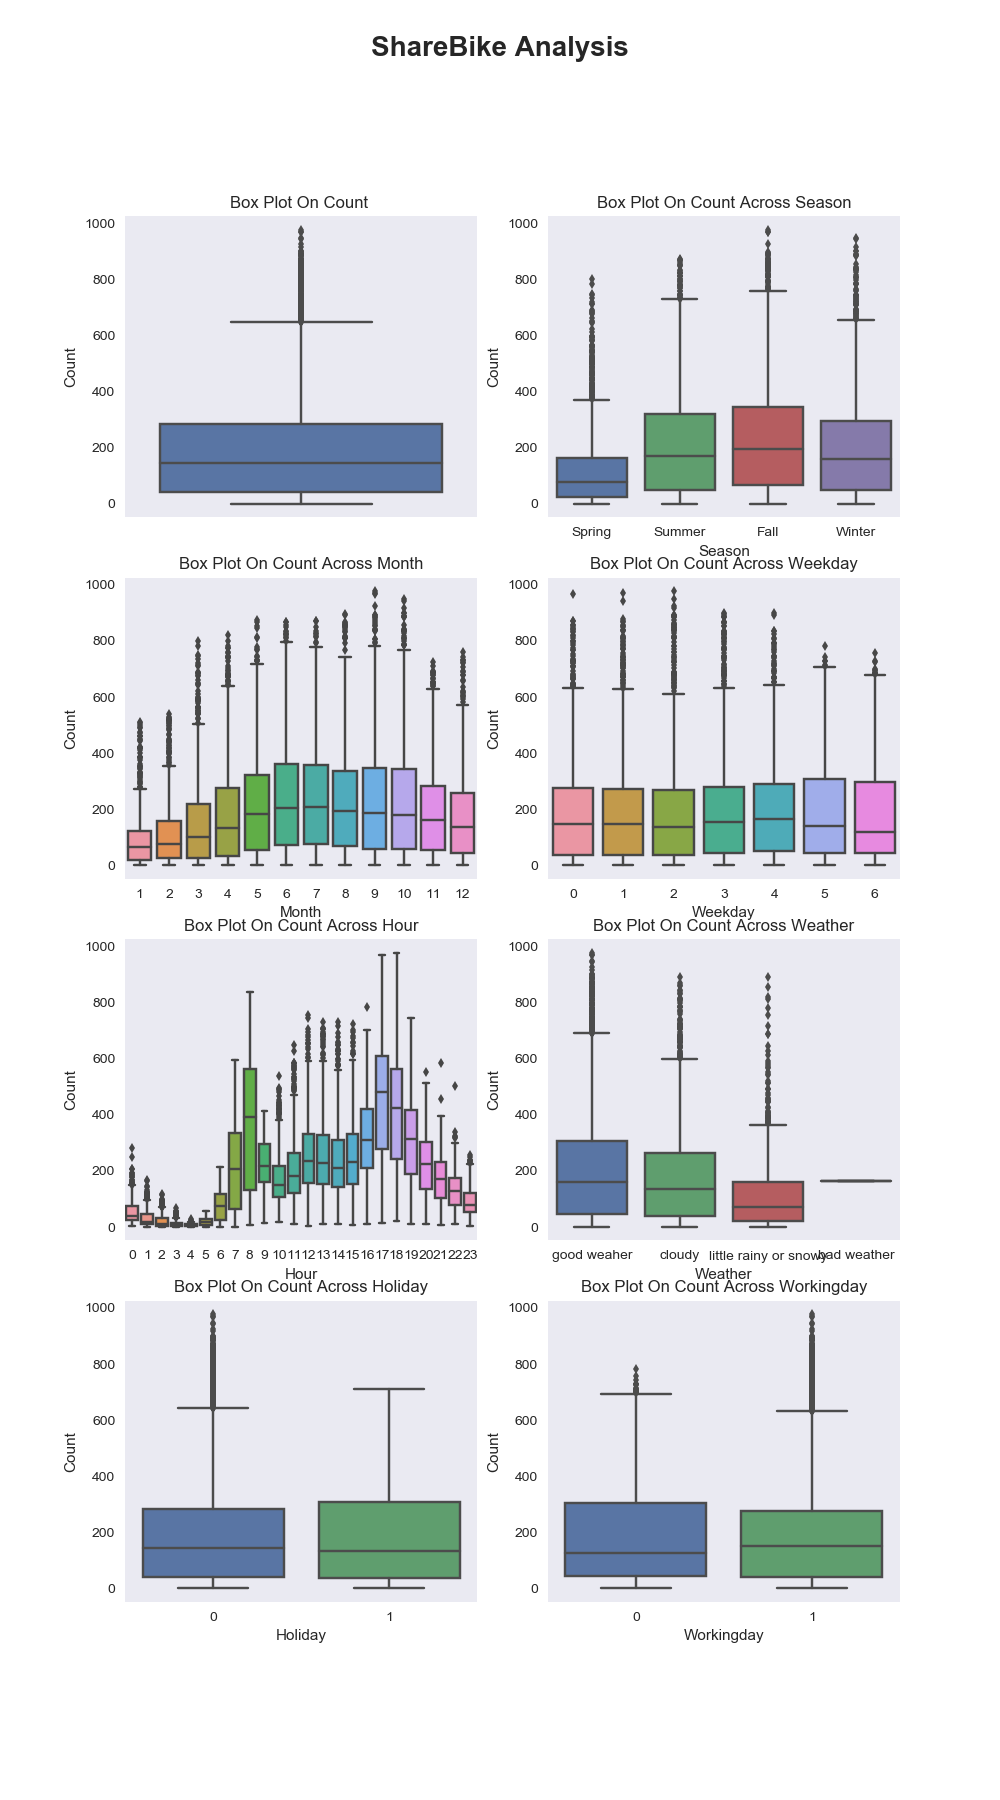

[Text(0,0.5,'Count'),
 Text(0.5,0,'Workingday'),
 Text(0.5,1,'Box Plot On Count Across Workingday')]

In [34]:
fig, axes = plt.subplots(4, 2)
fig.suptitle("ShareBike Analysis",fontsize=20,fontweight="bold")
sns.set(style='darkgrid')
fig.set_size_inches(10, 18)
ax1=sns.boxplot(data=train_X,y='count',orient='v',ax=axes[0][0])#count箱线图
ax2=sns.boxplot(data=train_X,x='season_word',y='count',orient='v',ax=axes[0][1])#季节season-count箱线图
ax3=sns.boxplot(data=train_X,x='month',y='count',orient='v',ax=axes[1][0])#月份month-count箱线图
ax4=sns.boxplot(data=train_X,x='weekday',y='count',orient='v',ax=axes[1][1])#星期weekday-count箱线图
ax5=sns.boxplot(data=train_X,x='hour',y='count',orient='v',ax=axes[2][0])#一天内hour-count箱线图
ax6=sns.boxplot(data=train_X,x='weather_word',y='count',orient='v',ax=axes[2][1])#天气weather-count箱线图
ax7=sns.boxplot(data=train_X,x='holiday',y='count',orient='v',ax=axes[3][0])#假期holiday-count箱线图
ax8=sns.boxplot(data=train_X,x='workingday',y='count',orient='v',ax=axes[3][1])#工作日workingday-count箱线图

axes[0][0].set( ylabel='Count',title="Box Plot On Count ")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Month")
axes[1][1].set(xlabel='Weekday', ylabel='Count',title="Box Plot On Count Across Weekday")
axes[2][0].set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hour")
axes[2][1].set(xlabel='Weather', ylabel='Count',title="Box Plot On Count Across Weather")
axes[3][0].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holiday")
axes[3][1].set(xlabel='Workingday', ylabel='Count',title="Box Plot On Count Across Workingday")

## 分析

* 每小时的租车人数中位数在150上下
* 夏秋季节天气温暖租车量较高
* 工作日相较于假期租车量要多一点，以及一天24小时内早高峰和晚高峰的租车量最多，说明通勤是租车的主要动机
* 天气越好租车量越大

## 租车人数在连续变量下的可视化分析

<IPython.core.display.Javascript object>


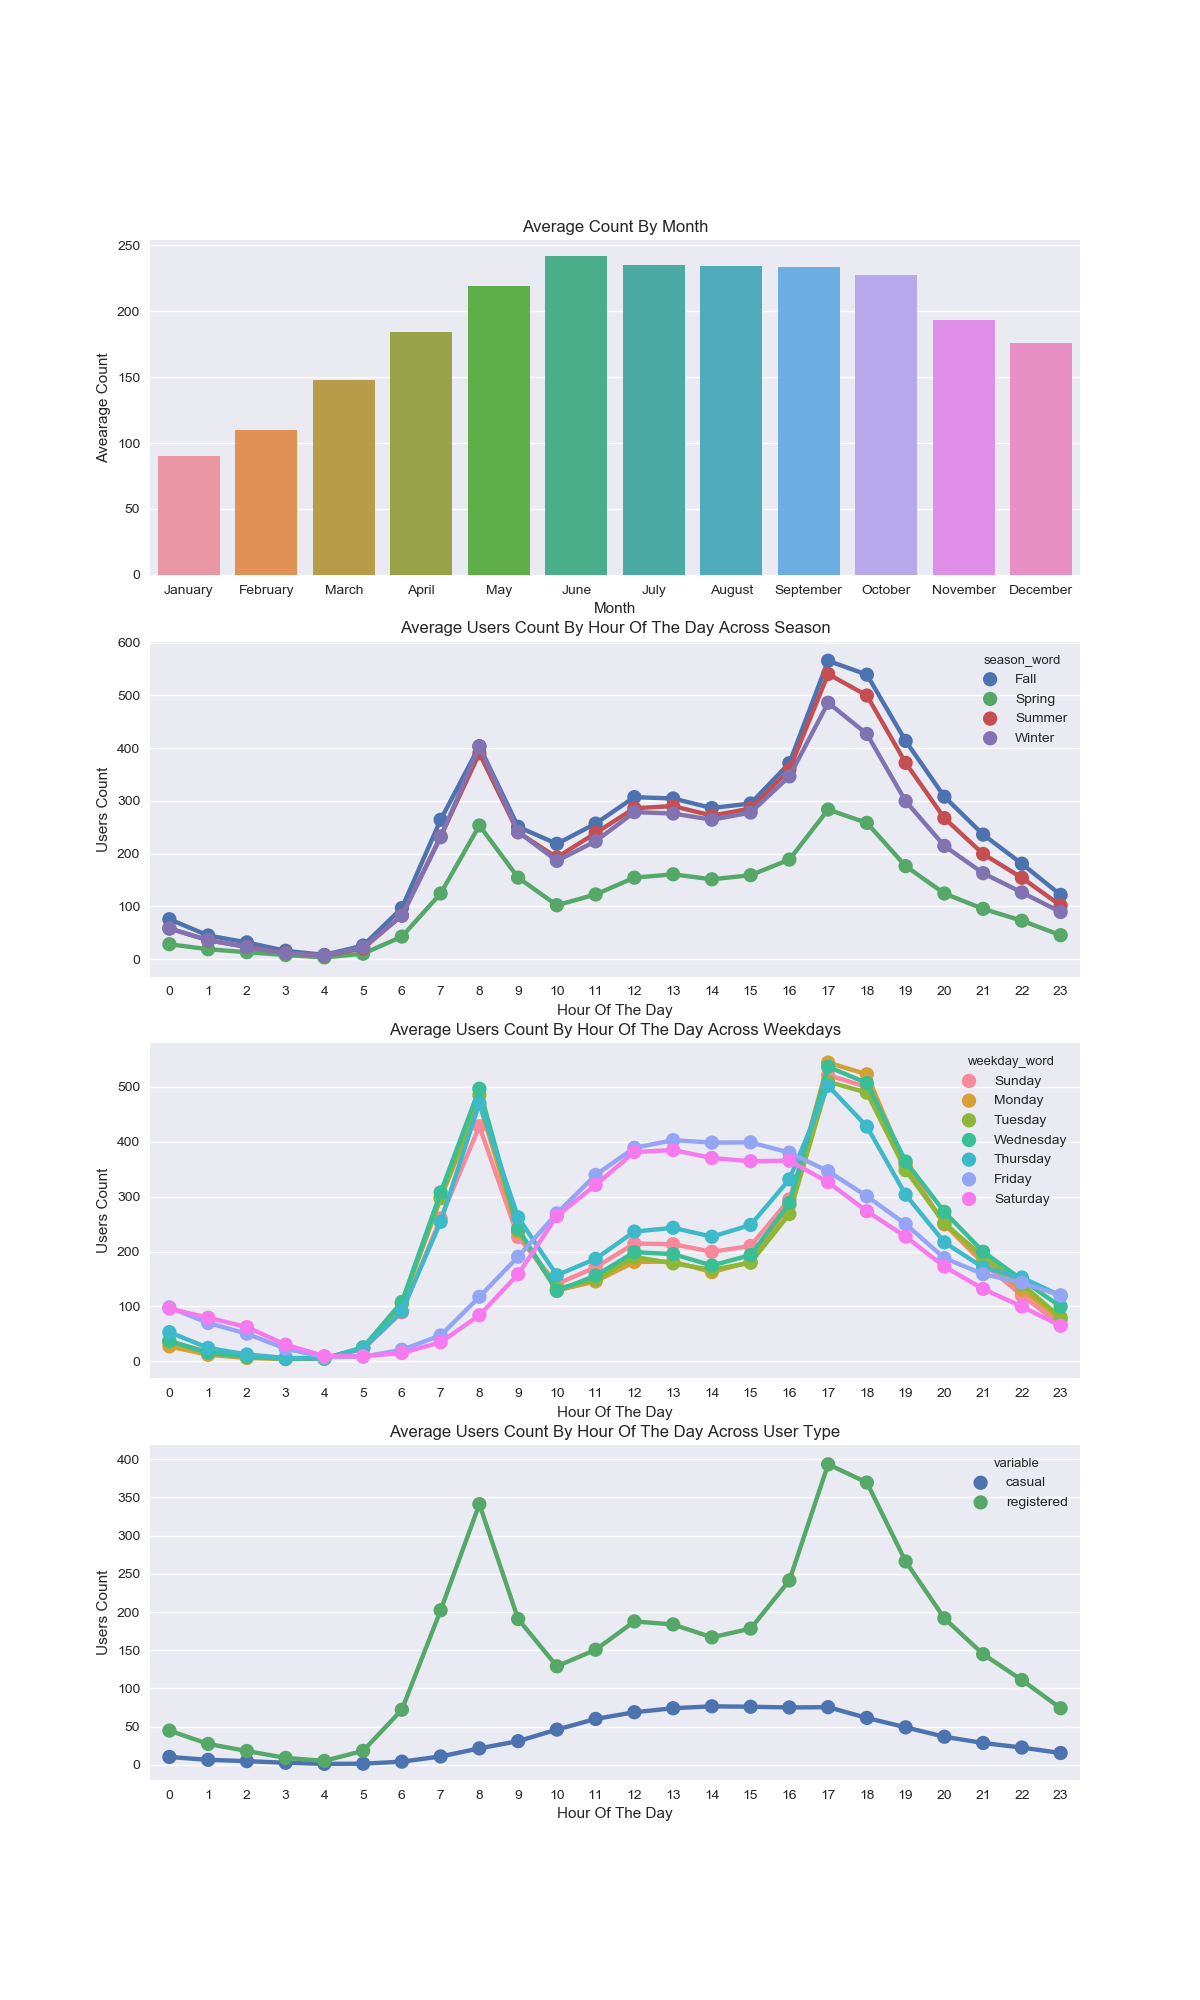

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

In [36]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
monthDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
#月平均租车量
monthAggregated = pd.DataFrame(train_X.groupby("month")["count"].mean()).reset_index()
monthAggregated["month_word"]=monthAggregated["month"].map(monthDict)
sns.barplot(data=monthAggregated,x="month_word",y="count",ax=ax1)#order=sortOrder
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
#不同季节每天的平均租车量
hourseasonAggregated = pd.DataFrame(train_X.groupby(["hour","season_word"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourseasonAggregated["hour"], y=hourseasonAggregated["count"],hue=hourseasonAggregated["season_word"], data=hourseasonAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#每星期每天平均租车量
hourweekAggregated = pd.DataFrame(train_X.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hourweekAggregated["weekday_word"]=hourweekAggregated["weekday"].map(weekDict)
sns.pointplot(x=hourweekAggregated["hour"], y=hourweekAggregated["count"],hue=hourweekAggregated["weekday_word"], data=hourweekAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

#每天租车的不同用户类型
hourTransformed = pd.melt(train_X[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
houruserAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houruserAggregated["hour"], y=houruserAggregated["value"],hue=houruserAggregated["variable"],hue_order=["casual","registered"], data=houruserAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

## 分析

* 五月到十月的用车人数是最多的，应该跟气温有关系
* 工作日上下班高峰期用车最多，休息日中午到下午用车最多

## 课外延伸作图试验

<IPython.core.display.Javascript object>


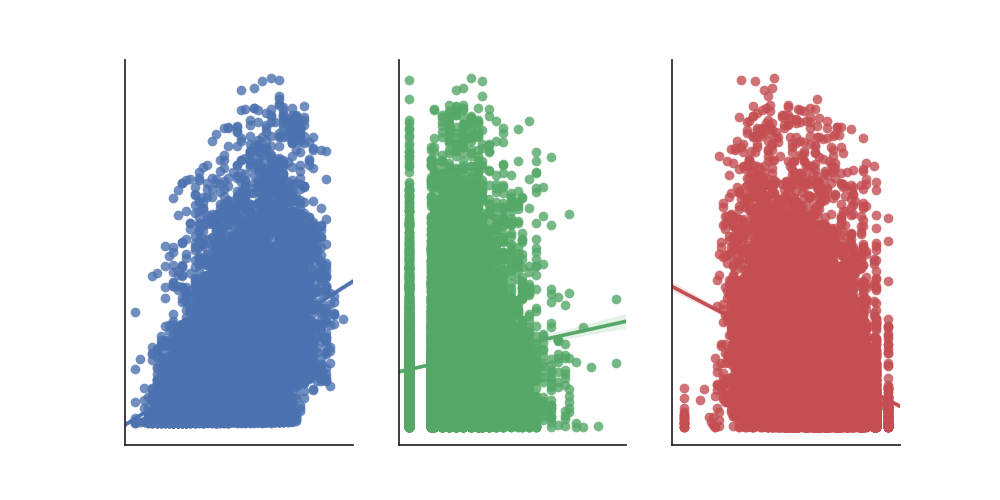

In [39]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(10, 5)
sns.set(style='white')
sns.despine()
ax1=sns.regplot(x="temp", y="count", data=train_X,ax=ax1)
ax2=sns.regplot(x="windspeed", y="count", data=train_X,ax=ax2)
ax3=sns.regplot(x="humidity", y="count", data=train_X,ax=ax3)

#ax1.set(xlabel='temp',ylabel='count')
ax1.set_xlabel('temp',color='white',fontsize=15)
ax1.set_ylabel('count',color='white',fontsize=15)
ax2.set_xlabel('windspeed',color='white',fontsize=15)
ax2.set_ylabel('count',color='white',fontsize=15)
ax3.set_xlabel('humidity',color='white',fontsize=15)
ax3.set_ylabel('count',color='white',fontsize=15)

ax1.tick_params(colors='white',labelsize=10, labelcolor='white')
ax2.tick_params(colors='white',labelsize=10, labelcolor='white')
ax3.tick_params(colors='white',labelsize=10, labelcolor='white')